In [1]:
import warnings
warnings.filterwarnings("ignore")

from E_Salary_Cities import *
from I_CompanySize_Technology import *

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> State & Refine QS</h1></div>

In [2]:
COMPANY_SIZE='Company size'
TECHNOLOGY='Your main technology / programming language'
BIG='1000+'
MEDIUM='100-1000'
df_2020,df_2019,df_2018=read()
df_merged=merge([df_2020,df_2019],common_columns=[COMPANY_SIZE,TECHNOLOGY])

In [3]:
df_merged.head()

,Company size,Your main technology / programming language
0,51-100,TypeScript
1,101-1000,Ruby
2,101-1000,Javascript / Typescript
3,51-100,Javascript
4,101-1000,C# .NET


> #### _`QS: What is the most used technology in Software Engineering for a mid-sized level company? `_
> #### _`QS: Can we say the same technology is the most popular for a big-sized company or not?  `_
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| The Quetsion is Answerable & of interest & Novel | Did some reasearch online and poeple always ask what language do we need to learn  and Which coding languages are used by the world’s top companies?|_`Matches`_  because people may be interested in this question as the language can influence their job opportunities and career growth.Knowing these languages could potentially increase a programmer’s chances of being hired by these companies Such af FAANG companies |


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Explore Data</h1></div>

> ***
> ### _`Some Data Cleaning`_
> ***

In [4]:
print("Before cleaning, Company sizes : ",df_merged[COMPANY_SIZE].unique())
df_cleaned=clean_company_size(df=df_merged,company_size=COMPANY_SIZE)
print("After cleaning, Company sizes : ",df_cleaned[COMPANY_SIZE].unique())

Before cleaning, Company sizes :  ['51-100' '101-1000' '11-50' '1000+' nan 'up to 10' '50-100' '10-50'
 '100-1000']
After cleaning, Company sizes :  ['50-100' '100-1000' '10-50' '1000+' 'up to 10']


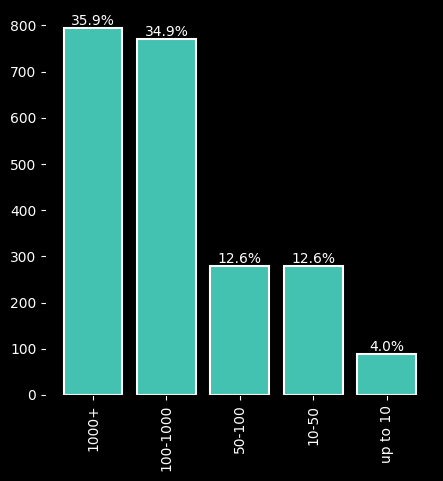

In [5]:
plot_single_histogram(df=df_cleaned,column=COMPANY_SIZE)

> ***
> ### _`Interpretations:`_
> - _`We can see that the big Sized Companies (1000+) have the highest % in the dataset`_
> - _`Followed by Mid Sized Companies (100-1000) `_
> - _`The number of people in each category of Bigsized and MidSized are quite close to each other `_
> ***

In [6]:
print('Before cleaning : {}  unique technology '.format(df_cleaned[TECHNOLOGY].nunique()))
df_cleaned=clean_technology(df=df_cleaned,column=TECHNOLOGY,filter=30)
print('After cleaning : {}  unique technology '.format(df_cleaned[TECHNOLOGY].nunique()))

Before cleaning : 274  unique technology 
After cleaning : 17  unique technology 


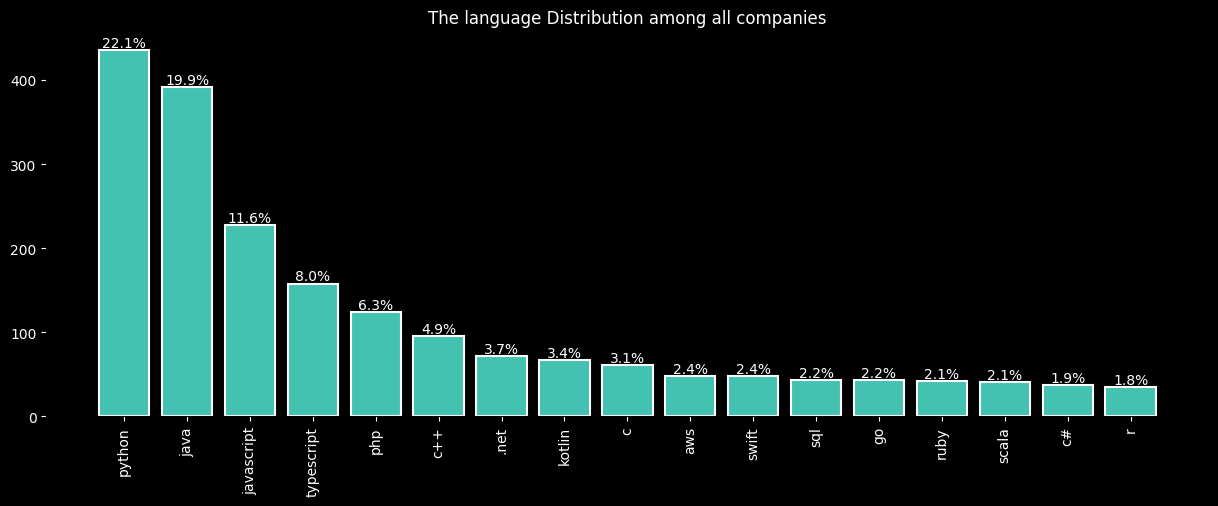

In [13]:
plot_single_histogram(df=df_cleaned,column=TECHNOLOGY,title='The language Distribution among all companies', figsize=(15, 5))

> ***
> ### _`Interpretations:`_
> - _`We can see that generally python is the most used technology  among the rest of the technologies regardless of the company size`_
> - _`Followd by Java which is still a very big peak`_
> - _`This was done after filtering those technologies with frequency less than 30 in the dataset`_
> ***

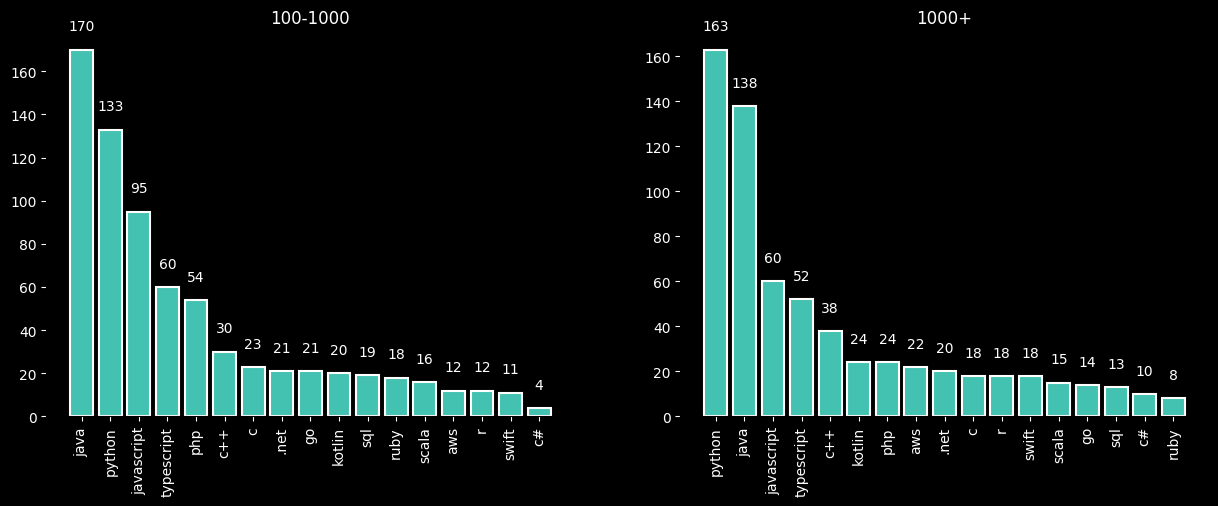

In [14]:
df=df_cleaned[df_cleaned[COMPANY_SIZE].isin([BIG,MEDIUM])]
plot_histogram_grid(df, TECHNOLOGY, COMPANY_SIZE, figsize=(15, 5))

> ***
> ### _`Interpretations:`_
> - _`Java is the most used technology in the midsized companies followed by python & javascript`_
> - _`In BigSized companies it is python then Java. Still javascript is the 3rd most used technology in bigsized companies`_
> ***

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Python to be the most used langauge in all company sizes |  Showed Several plots |_`DIDnot Match`_  looking back at the distribution of langauages used. Yes although python is the most used, still java is frequently used by a minor difference between them|


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Build Models</h1></div>

> ***
> ### _`Z_test for proportion`_
> - _`We need to proof that "Java" which is the most used technology in Midsized companies , is the most used in Medium sized companies or not?`_
> - _`So typically to perform such test, we will need to perform "z test for propotion" for EVERY  technology other than "Java" `_
> 
> ${H}_{o} : \% Java <= \%technology $ 
>
> _`where technology is all other technologies in Big sized companies other than Java `_ 
>
> ${H}_{a} : \% Java > \%technology $
>
> #### _`Ztest for proportion `_
> - _`Assumes that we have atleast 10 records to perform it`_
> - _`Here it is right tailed test , so we must have z_values >0`_
> - _`the restured Pvalue should be divide by 2`_
> ***

In [9]:

df_big_companies= df_cleaned[df_cleaned[COMPANY_SIZE]==BIG]
df_medium_companies = df_cleaned[df_cleaned[COMPANY_SIZE]==MEDIUM]
# Get the technology with the highest count in medium sized companies
max_technology = df_medium_companies[TECHNOLOGY].value_counts().idxmax()
hypothesis_result,pvals=z_test_proportion_companies(max_technology,df_cleaned,COMPANY_SIZE,BIG,MEDIUM,TECHNOLOGY)
hypothesis_result

,typescript,php,javascript,python,c#,scala,go,kotlin,swift,c++,.net,r,sql,c,aws
0,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True


In [10]:
pvals

,typescript,php,javascript,python,c#,scala,go,kotlin,swift,c++,.net,r,sql,c,aws
0,7.516371e-12,5.460280e-22,8.910403e-10,0.050305,2.810997e-29,1.824423e-26,5.229500e-27,5.460280e-22,6.803170e-25,2.711224e-16,6.841573e-24,6.803170e-25,1.465858e-27,6.803170e-25,6.351995e-23


In [11]:
# Get the technology with the highest count in big sized companies
max_technology = df_big_companies[TECHNOLOGY].value_counts().idxmax()
hypothesis_result,pvals=z_test_proportion_companies(max_technology,df_cleaned,COMPANY_SIZE,BIG,MEDIUM,TECHNOLOGY)
hypothesis_result

,typescript,php,javascript,java,c#,scala,go,kotlin,swift,c++,.net,r,sql,c,aws
0,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True


In [12]:
pvals

,typescript,php,javascript,java,c#,scala,go,kotlin,swift,c++,.net,r,sql,c,aws
0,6.156792e-17,2.426741e-28,1.838825e-14,0.050305,4.450144e-36,3.963486e-33,1.060785e-33,2.426741e-28,1.841595e-31,4.733124e-22,2.168037e-30,1.841595e-31,2.783401e-34,1.841595e-31,2.375137e-29


<!-- https://mverbakel.github.io/2021-02-13/two-sample-proportions -->

https://mverbakel.github.io/2021-02-13/two-sample-proportions

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Java to be the most used langauge in all Big sized companies |  Did z hypothesis testing for proprotion |_`DIDnot Match`_  looking back at the distribution of langauages , we found out that Python is the most used language in  Big sized companies |


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Interpret Results</h1></div>

> ***
> ### _`Interpretations:`_
> - _`Java is the most used technology in the midsized companies exculding python`_
> - _`It MAYBE the case that java < python in midsized companies  but we doesnot have evidence to suggest that over the population`_
> ***

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Communicate Results</h1></div>

> ***
> ### _`Suggestions:`_
> - _`It seems that Java & python are in a very competitive case. Although no certain case that shows that one language is more dominant than the other , it is still a good potential if you are a new learner and want to join the field to start with one of these 2 language.`_
> -`So we are just narrowing down the space of searching to only 2 language & you might  be condifent that one of these is top in Big sized companies if you wish to join the big companies`
> ***